# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations
##### 1. First observation we have is that Northern hemisphere is slightly hotter than Southern Hemisphere. In Northern hemisphere temperature rises from equator and is highest around 25 degrees of latitude. It starts to decline with the latitude. In Southern hemisphere it declines with the latitude.
##### 2. Nothern hemisphere is more evenly humid in comparison to Southern hemisphere. In Southern hemisphere, cities beyond -30 degree latitude have humidity more than 60%.
##### 3. Northen hemisphere is more cloudy than Southern hemisphere. Northern hemisphere also has more windy cities than southern hemisphere. 

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from datetime import datetime
from scipy.stats import linregress
from citipy import citipy

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_city = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

In [7]:
# setting URL for open weather to get data on above cities
url = "http://api.openweathermap.org/data/2.5/weather?"

# setting units of measurement to imperial 
units = "imperial"

# setting the query URL with API key
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# settings for the API calls on the cities
# set up lists to hold reponse info
country = []
date = []
lat = []
lng = []
temp = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()

# try and except for the code to go through every city, regardless if there is an error at any city
    try:
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        print(f"The Country information received is: {country}")
        print(f"The Date information received is: {date}")
        print(f"The Latitude information received is: {lat}")
        print(f"The Longitude information received is: {lng}")
        print(f"The Temperature information received is: {temp}")
        print(f"The Temperature information received is: {temp_max}")
        print(f"The Humidity information received is: {humidity}")
        print(f"The Cloudiness information received is: {cloudiness}")
        print(f"The Wind_speed information received is: {wind_speed}")
        
        pass

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 1624185674, 1624185675]
The Latitude information received is: [77.484, -7.4706, -33.9258, -46.1927, 66.3167, 57.0531]
The Longitude information received is: [-69.3632, -34.8086, 18.4232, 168.8643, -179.1667, -135.33]
The Temperature information received is: [36.16, 72.19, 79.88, 38.48, 51.44, 57.09]
The Temperature information received is: [36.16, 72.19, 82.11, 38.48, 51.44, 57.09]
The Humidity information received is: [63, 78, 25, 98, 53, 77]
The Cloudiness information received is: [0, 29, 0, 53, 21, 90]
The Wind_speed information received is: [5.14, 7.27, 14.97, 3.27, 6.69, 3.44]
The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 1624185674, 1624185675, 1

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 1624185674, 1624185675, 1624185676, 1624185677, 1624185629, 1624185678, 1624185679, 1624185680, 1624185681, 1624185681, 1624185508, 1624185683, 1624185683, 1624185684, 1624185685, 1624185686, 1624185417, 1624185687, 1624185688, 1624185658, 1624185689, 1624185690, 1624185691, 1624185691, 1624185692, 1624185693, 1624185694, 1624185695, 1624185696, 1624185697, 1624185698, 1624185699, 1624185699, 1624185700, 1624185701, 1624185701, 1624185702, 1624185703, 1624185704, 1624185704, 1624185705, 1624185706, 1624185707, 1624185707, 1624185708, 1624185709, 1624185709, 162

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 1624185674, 1624185675, 1624185676, 1624185677, 1624185629, 1624185678, 1624185679, 1624185680, 1624185681, 1624185681, 1624185508, 1624185683, 1624185683, 1624185684, 1624185685, 1624185686, 1624185417, 1624185687, 1624185688, 1624185658, 1624185689, 1624185690, 1624185691, 1624185691, 1624185692, 1624185693, 1624185694, 1624185695, 1624185696, 1624185697, 1624185698, 1624185699, 162418569

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 1624185674, 1624185675, 1624185676, 1624185677, 1624185629, 1624185678, 1624185679, 1624185680, 1624185681, 1624185681, 1624185508, 1624185683, 1624185683, 1624185684, 1624185685, 1624185686, 1624185417, 1624185687, 1624185688, 1624185658, 1624185689, 1624185690, 1624185691, 1624185691, 1624185692, 1624185693, 1624185694, 1624185695, 1624185696, 162

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 1624185674, 1624185675, 1624185676, 1624185677, 1624185629, 1624185678, 1624185679, 1624185680, 1624185681, 1624185681, 1624185508, 1624185683, 1624185683, 1624185684, 1624185685, 1624185686, 1624185417, 1624185687, 1624185688, 1624185658, 1624185689, 1624185690, 1624185691, 1624185691, 1624185692, 1624185693, 1624185694, 162

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 1624185674, 1624185675, 1624185676, 1624185677, 1624185629, 1624185678, 1624185679, 1624185680, 1624185681, 1624185681, 1624185508, 1624185683, 1624185683, 1624185684, 1624185685, 1624185686, 1624185417, 1624185687, 1624185688, 1624185658, 162

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 1624185674, 1624185675, 1624185676, 1624185677, 1624185629, 1624185678, 1624185679, 1624185680, 1624185681, 1624185681, 1624185508, 1624185683, 1624185683, 1624185684, 162

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 162

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG']
The Date information received is: [1624185671, 1624185672, 1624185673, 1624185674, 162

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US']
The Date information received is: [1624185671, 1624185672, 1624185673, 162418567

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE']
The Date infor

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

The Country information received is: ['GL', 'BR', 'ZA', 'NZ', 'RU', 'US', 'US', 'SS', 'BR', 'CA', 'US', 'CN', 'ZA', 'IS', 'AR', 'CA', 'CA', 'CN', 'CL', 'VE', 'HK', 'MR', 'ZM', 'US', 'MV', 'US', 'KI', 'PT', 'EC', 'PE', 'GL', 'PF', 'EG', 'HT', 'ZA', 'US', 'RU', 'IS', 'GL', 'CF', 'US', 'ZA', 'CA', 'NZ', 'CO', 'NZ', 'US', 'MU', 'RU', 'UA', 'TO', 'SJ', 'BR', 'RU', 'AU', 'ES', 'US', 'JP', 'RU', 'MX', 'MU', 'SD', 'PT', 'RU', 'BR', 'ZA', 'RU', 'ID', 'US', 'AU', 'NE', 'CA', 'RU', 'NP', 'AU', 'NO', 'CA', 'CV', 'ZA', 'MG', 'US', 'VU', 'AR', 'GL', 'NZ', 'MM', 'RU', 'PF', 'PH', 'BR', 'PE', 'GL', 'ZA', 'HT', 'ES', 'RU', 'VE', 'IN', 'KZ', 'KE', 'RU', 'PG', 'RU', 'RU', 'AO', 'US', 'LY', 'CA', 'US', 'MG', 'IN', 'IN', 'ID', 'MX', 'CL', 'VE', 'NA', 'AU', 'GR', 'IQ', 'JP', 'NZ', 'GT', 'GB', 'RU', 'CA', 'US', 'ID', 'ZA', 'US', 'BR', 'BR', 'NG', 'JP', 'CK', 'EG', 'SN', 'CA', 'RU', 'CL', 'VN', 'YE', 'CL', 'GL', 'IS', 'MG', 'US', 'PT', 'GL', 'US', 'PH', 'IR', 'RU', 'AR', 'CA', 'SD', 'PH', 'RE', 'RU', 'GF', 'U

In [13]:
# create a data frame for all the cities for their country, date, latitude, temperature, humidity, cloudiness and wind speed

city_data = {"City": cities,
             "Country": country,
             "Date":date,
            "Latitude": lat,
             "Longitude": lng,
             "Humidity": humidity,
            "Temperature": temp,
             "Temp Max" : temp_max,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed}

# creating the data frame from the city data 
city_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in city_data.items() ])).dropna()
city_df 


,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,qaanaaq,GL,1.624186e+09,77.4840,-69.3632,63.0,36.16,36.16,0.0,5.14
1,pitimbu,BR,1.624186e+09,-7.4706,-34.8086,78.0,72.19,72.19,29.0,7.27
2,cape town,ZA,1.624186e+09,-33.9258,18.4232,25.0,79.88,82.11,0.0,14.97
3,mataura,NZ,1.624186e+09,-46.1927,168.8643,98.0,38.48,38.48,53.0,3.27
4,egvekinot,RU,1.624186e+09,66.3167,-179.1667,53.0,51.44,51.44,21.0,6.69
...,...,...,...,...,...,...,...,...,...,...
525,iquique,US,1.624186e+09,39.4470,-86.1758,93.0,71.24,73.90,55.0,7.20
526,kuryk,MV,1.624186e+09,5.4444,73.3657,73.0,82.83,82.83,51.0,15.99
527,kathmandu,BR,1.624186e+09,-20.3297,-40.2925,83.0,69.75,69.75,75.0,5.75
528,chama,RU,1.624186e+09,55.4888,60.8767,36.0,74.89,74.89,8.0,18.52


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# export the data in .csv file to designated folder
city_df.to_csv("output_data/city-df.csv", index=False)

city_df

,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,qaanaaq,GL,1.624186e+09,77.4840,-69.3632,63.0,36.16,36.16,0.0,5.14
1,pitimbu,BR,1.624186e+09,-7.4706,-34.8086,78.0,72.19,72.19,29.0,7.27
2,cape town,ZA,1.624186e+09,-33.9258,18.4232,25.0,79.88,82.11,0.0,14.97
3,mataura,NZ,1.624186e+09,-46.1927,168.8643,98.0,38.48,38.48,53.0,3.27
4,egvekinot,RU,1.624186e+09,66.3167,-179.1667,53.0,51.44,51.44,21.0,6.69
...,...,...,...,...,...,...,...,...,...,...
525,iquique,US,1.624186e+09,39.4470,-86.1758,93.0,71.24,73.90,55.0,7.20
526,kuryk,MV,1.624186e+09,5.4444,73.3657,73.0,82.83,82.83,51.0,15.99
527,kathmandu,BR,1.624186e+09,-20.3297,-40.2925,83.0,69.75,69.75,75.0,5.75
528,chama,RU,1.624186e+09,55.4888,60.8767,36.0,74.89,74.89,8.0,18.52


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [103]:
#  Get the indices of cities that have humidity over 100%.
city_humidity = city_df.loc[(city_df["Humidity"] >= 100)].index
city_humidity.tolist()

[50, 115, 125, 159, 172, 193, 262, 367, 375, 412, 428, 436]

In [106]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# calculating quartiles and IQR for humidity in city_df
# sorting the values of humidity in city_df
sort_humidity = np.sort(city_df["Humidity"])
Q1_humidity = np.percentile((city_df["Humidity"]), 25, interpolation = 'midpoint')
Q2_humidity = np.percentile((city_df["Humidity"]), 50, interpolation = 'midpoint')
Q3_humidity = np.percentile((city_df["Humidity"]), 75, interpolation = 'midpoint')

# calculating IQR for humidity
IQR_humidity = Q3_humidity - Q1_humidity

# calculating lower limit and upper limit for humidity
low_lim_humidity = Q1_humidity - 1.5 * IQR_humidity
up_lim_humidity = Q3_humidity + 1.5 * IQR_humidity


# finding if there is any outlier in city_df for humidity
outlier_humidity = city_df.loc[(city_df["Humidity"] < low_lim_humidity) & (city_df["Humidity"] > up_lim_humidity) ] 

len(outlier_humidity)


0

In [107]:
# since there are no outlier in the city_df dataframe, clean citydata frame would be same as city dataframe
# defining clean_city_data

clean_city_data = city_df
clean_city_data


,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,qaanaaq,GL,1.624186e+09,77.4840,-69.3632,63.0,36.16,36.16,0.0,5.14
1,pitimbu,BR,1.624186e+09,-7.4706,-34.8086,78.0,72.19,72.19,29.0,7.27
2,cape town,ZA,1.624186e+09,-33.9258,18.4232,25.0,79.88,82.11,0.0,14.97
3,mataura,NZ,1.624186e+09,-46.1927,168.8643,98.0,38.48,38.48,53.0,3.27
4,egvekinot,RU,1.624186e+09,66.3167,-179.1667,53.0,51.44,51.44,21.0,6.69
...,...,...,...,...,...,...,...,...,...,...
525,iquique,US,1.624186e+09,39.4470,-86.1758,93.0,71.24,73.90,55.0,7.20
526,kuryk,MV,1.624186e+09,5.4444,73.3657,73.0,82.83,82.83,51.0,15.99
527,kathmandu,BR,1.624186e+09,-20.3297,-40.2925,83.0,69.75,69.75,75.0,5.75
528,chama,RU,1.624186e+09,55.4888,60.8767,36.0,74.89,74.89,8.0,18.52


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [160]:
# creating function for date of analysis

date = dt.date.today()

## Latitude vs. Temperature Plot

Date of Analysis: 2021-06-21


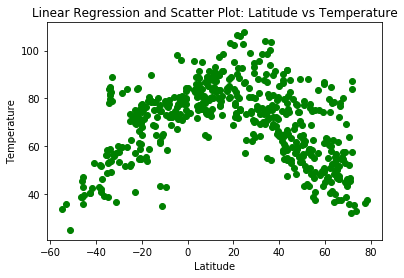

In [162]:
# create scatter plot for Latitude vs Temperatrure 

# Create a Scatter Plot for Latitude vs Temperature
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Temperature"]

# plotting scatter plot and setting axis labels and title
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Linear Regression and Scatter Plot: Latitude vs Temperature")

# saving fig in .png format
plt.savefig("output_data/lat vs temp.png")
print("Date of Analysis:", date)

# Show plot
plt.show();

##### Temperature in northern hemisphere is increasing, as latitude is increasing from 0 degrees and is highest around 25 degrees. In southern hemisphere temperature is lower than the northern hemisphere in same area with the decrease of latitude.

## Latitude vs. Humidity Plot

Date of Analysis: 2021-06-21


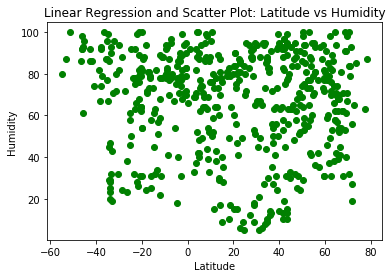

In [164]:
# create scatter plot for Latitude vs Humidity 

# Create a Scatter Plot for Latitude vs Humidity
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Humidity"]

# plotting scatter plot and setting axis labels and title
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear Regression and Scatter Plot: Latitude vs Humidity")

# saving fig in .png format
plt.savefig("output_data/lat vs humidity.png")
print("Date of Analysis:", date)

# Show plot
plt.show();

##### Humidity varies in both the hemispheres depending on the different cities. 

## Latitude vs. Cloudiness Plot

Date of Analysis: 2021-06-21


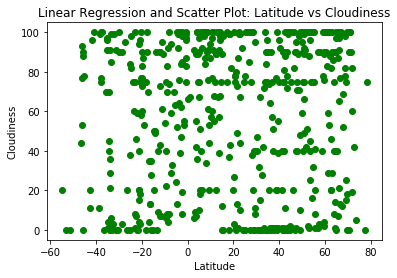

In [165]:
# create scatter plot for Latitude vs Cloudiness

# Create a Scatter Plot for Latitude vs Cloudiness
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Cloudiness"]

# plotting scatter plot and setting axis labels and title
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression and Scatter Plot: Latitude vs Cloudiness")

# saving fig in .png format
plt.savefig("output_data/lat vs cloudiness.png")
print("Date of Analysis:", date)

# Show plot
plt.show();

##### Cloudiness in Northern and Southern hemisphere is very similar irrespective of Latitude

## Latitude vs. Wind Speed Plot

Date of Analysis: 2021-06-21


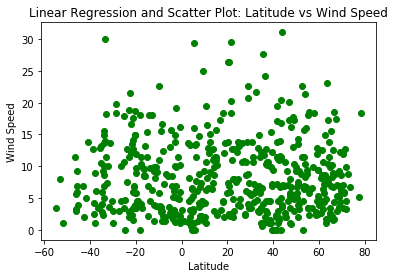

In [166]:
# create scatter plot for Latitude vs Wind Speed

# Create a Scatter Plot for Latitude vs Wind Speed
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Wind Speed"]

# plotting scatter plot and setting axis labels and title
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression and Scatter Plot: Latitude vs Wind Speed")

# saving fig in .png format
plt.savefig("output_data/lat vs wind speed.png")
print("Date of Analysis:", date)

# Show plot
plt.show();

##### Wind Speed is very consistent and similar in both the hemispheres irrespective of the Latitude

## Linear Regression

In [112]:
# generating northern hemisphere data frame

nth_hemi =  clean_city_data.loc[(city_df['Latitude'] >= 0)]
nth_hemi

,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,qaanaaq,GL,1.624186e+09,77.4840,-69.3632,63.0,36.16,36.16,0.0,5.14
4,egvekinot,RU,1.624186e+09,66.3167,-179.1667,53.0,51.44,51.44,21.0,6.69
5,sitka,US,1.624186e+09,57.0531,-135.3300,77.0,57.09,57.09,90.0,3.44
6,illoqqortoormiut,US,1.624186e+09,42.1584,-72.3287,82.0,64.20,67.93,90.0,4.61
7,palmer,SS,1.624186e+09,8.4596,25.6780,44.0,88.72,88.72,100.0,2.13
...,...,...,...,...,...,...,...,...,...,...
524,tokur,PK,1.624186e+09,31.3411,69.4481,5.0,95.74,95.74,32.0,11.39
525,iquique,US,1.624186e+09,39.4470,-86.1758,93.0,71.24,73.90,55.0,7.20
526,kuryk,MV,1.624186e+09,5.4444,73.3657,73.0,82.83,82.83,51.0,15.99
528,chama,RU,1.624186e+09,55.4888,60.8767,36.0,74.89,74.89,8.0,18.52


In [113]:
# generating southern hemisphere data frame

sth_hemi =  clean_city_data.loc[(city_df['Latitude'] < 0)]
sth_hemi

,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
1,pitimbu,BR,1.624186e+09,-7.4706,-34.8086,78.0,72.19,72.19,29.0,7.27
2,cape town,ZA,1.624186e+09,-33.9258,18.4232,25.0,79.88,82.11,0.0,14.97
3,mataura,NZ,1.624186e+09,-46.1927,168.8643,98.0,38.48,38.48,53.0,3.27
8,raga,BR,1.624186e+09,-24.7911,-50.0119,92.0,52.30,52.30,98.0,4.65
12,yuxia,ZA,1.624186e+09,-34.4187,19.2345,45.0,83.80,83.80,40.0,2.35
...,...,...,...,...,...,...,...,...,...,...
515,tsogni,MZ,1.624186e+09,-25.0519,33.6442,58.0,73.44,73.44,38.0,10.65
517,pundaguitan,AU,1.624186e+09,-12.0667,134.2667,68.0,74.73,74.73,43.0,9.86
519,robore,BR,1.624186e+09,-1.8283,-44.8683,94.0,77.41,77.41,55.0,5.08
522,maues,CD,1.624186e+09,-2.9500,25.9500,31.0,96.24,96.24,84.0,1.25


In [167]:
# defining the linear regression function for plots
def linear_regression(x_value,y_value):
    (slope, intercept, rsq, pvalue, stderr) = linregress(x_value, y_value)
    
    # defining linear regression formula    
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # plotting scatter plot
    plt.scatter(x_value,y_value,color="green")
    
    # plotting linear regression line
    plt.plot(x_value,regress_values,"r-")
    print(f"The r-square is: {rsq**2}");
    print(f"The p value is: {pvalue}")
    print("Date of Analysis:", date)
    return line_eq

# defining annotate function
def annotate(line_eq,x,y):
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

####  Northern Hemisphere -  Max Temprature vs. Latitude Linear Regression

The r-square is: 0.45431904493749403
The p value is: 6.898512048154718e-49
Date of Analysis: 2021-06-21


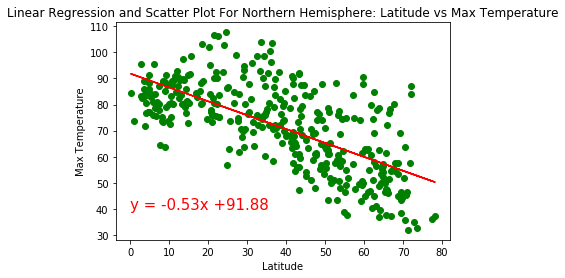

In [168]:
# plotting scatter plot and linear regression line for Latitude vs Maximum Temperature
plot_linear = linear_regression(nth_hemi["Latitude"],nth_hemi["Temp Max"])
annotate(plot_linear, 0, 40)

# setting labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# setting title for the plot 
plt.title("Linear Regression and Scatter Plot For Northern Hemisphere: Latitude vs Max Temperature");

# saving the picture as .png 
plt.savefig("output_data/nth-hemi lat vs max temp.png")

##### Linear regression line captures roughly 45% of variance of  Max Temperature. Max temperature is decreasing with latitude. p value tells us that the correlation is statistically significant. 

####  Southern Hemisphere -  Max Temprature vs. Latitude Linear Regression

The r-square is: 0.4186088303735561
The p value is: 1.1764492099209414e-21
Date of Analysis: 2021-06-21


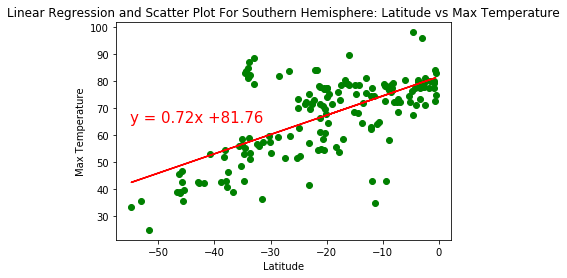

In [169]:
# plotting scatter plot and linear regression line for Latitude vs Maximum Temperature
plot_linear = linear_regression(sth_hemi["Latitude"],sth_hemi["Temp Max"])
annotate(plot_linear, -55, 65)

# setting labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# setting title for the plot
plt.title("Linear Regression and Scatter Plot For Southern Hemisphere: Latitude vs Max Temperature");

# saving the picture as .png
plt.savefig("output_data/sth-hemi lat vs max temp.png")

##### Linear regression line captures roughly 42% of variance of Max Temperature. Max temperature is increasing with latitude. p value tells us that the correlation is statistically significant

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is: 0.0016547800817168228
The p value is: 0.44225735821732515
Date of Analysis: 2021-06-21


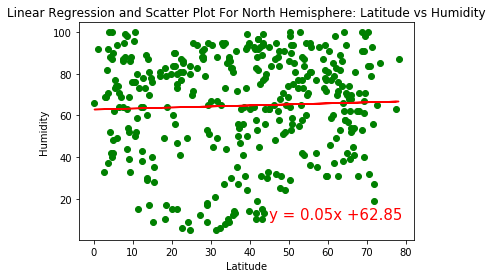

In [170]:
# plotting scatter plot and linear regression line for Latitude vs Humidity
plot_linear = linear_regression(nth_hemi["Latitude"],nth_hemi["Humidity"])
annotate(plot_linear, 45, 10)

# setting labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity") 

# setting title for the plot
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Humidity");

# saving the picture as .png
plt.savefig("output_data/nth-hemi lat vs humidity.png")

##### Linear regression line captures a small fraction of  variance of Humidity.  p value tells us that the correlation is not statistically significant

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is: 8.470413150038105e-05
The p value is: 0.9049022341157786
Date of Analysis: 2021-06-21


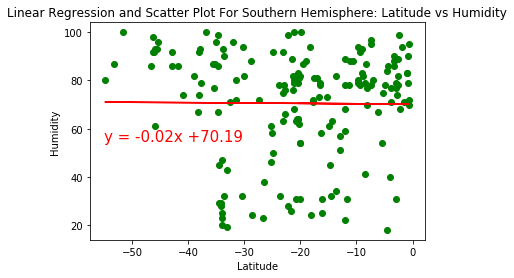

In [171]:
# plotting scatter plot and linear regression line for Latitude vs Humidity
plot_linear = linear_regression(sth_hemi["Latitude"],sth_hemi["Humidity"])
annotate(plot_linear, -55, 55)

# setting labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity") 

# setting title for the plot
plt.title("Linear Regression and Scatter Plot For Southern Hemisphere: Latitude vs Humidity");

# saving the picture as .png
plt.savefig("output_data/sth-hemi lat vs humidity.png")

##### Linear regression line captures a small fraction of variance of Humidity. p value tells us that the correlation is not statistically significant

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is: 0.0009570864670289097
The p value is: 0.5590423278382981
Date of Analysis: 2021-06-21


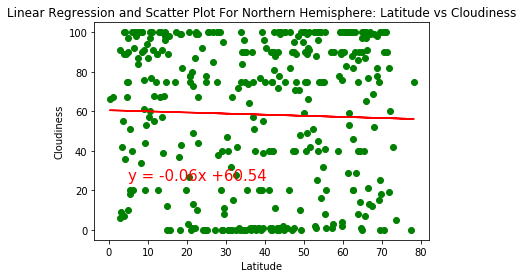

In [172]:
# plotting scatter plot and linear regression line for Latitude vs Cloudiness
plot_linear = linear_regression(nth_hemi["Latitude"],nth_hemi["Cloudiness"])
annotate(plot_linear, 5, 25)

# setting labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 

# setting title for the plot
plt.title("Linear Regression and Scatter Plot For Northern Hemisphere: Latitude vs Cloudiness");

# saving the picture as .png
plt.savefig("output_data/nth-hemi lat vs cloudiness.png")

##### Linear regression line captures a small fraction of variance of Cloudiness. p value tells us that the correlation is not statistically significant

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is: 0.021167912896458675
The p value is: 0.05760189792866852
Date of Analysis: 2021-06-21


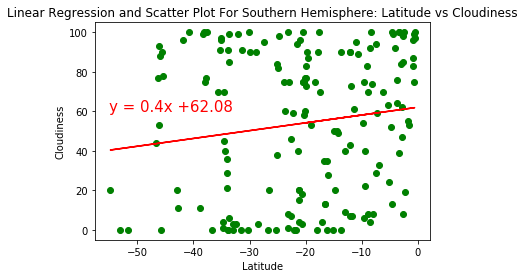

In [173]:
# plotting scatter plot and linear regression line for Latitude vs Cloudiness
plot_linear = linear_regression(sth_hemi["Latitude"],sth_hemi["Cloudiness"])
annotate(plot_linear, -55, 60)

# setting labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 

# setting title for the plot
plt.title("Linear Regression and Scatter Plot For Southern Hemisphere: Latitude vs Cloudiness");

# saving the picture as .png
plt.savefig("output_data/sth-hemi lat vs cloudiness.png")

##### Linear regression line could capture only 2% variance of Cloudiness in Southern hemisphere.  p value tells us that the correlation is not statistically significant

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is: 0.00016206616226931936
The p value is: 0.8100376441739078
Date of Analysis: 2021-06-21


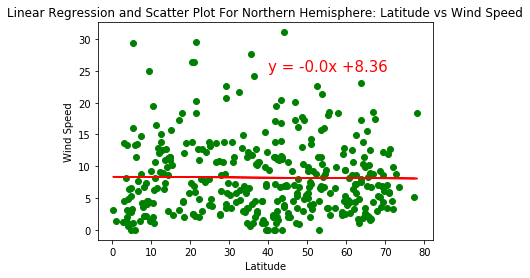

In [174]:
# plotting scatter plot and linear regression line for Latitude vs Windspeed
plot_linear = linear_regression(nth_hemi["Latitude"],nth_hemi["Wind Speed"])
annotate(plot_linear, 40, 25)

# setting labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 

# setting title for the plot
plt.title("Linear Regression and Scatter Plot For Northern Hemisphere: Latitude vs Wind Speed");

# saving the picture as .png
plt.savefig("output_data/nth-hemi lat vs wind speed.png")

##### Linear regression line captures a small fraction of variance of Wind Speed.  p value tells us that the correlation is not statistically significant

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is: 0.00021113529386683944
The p value is: 0.8503850313166552
Date of Analysis: 2021-06-21


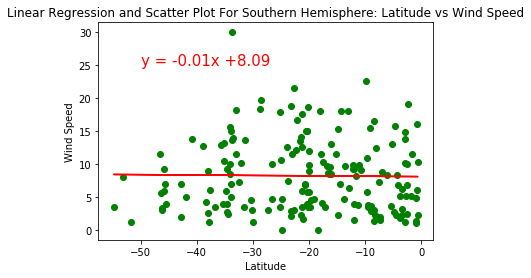

In [175]:
# plotting scatter plot and linear regression line for Latitude vs Windspeed
plot_linear = linear_regression(sth_hemi["Latitude"],sth_hemi["Wind Speed"])
annotate(plot_linear, -50, 25)

# setting labels for the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 

# setting title for the plot
plt.title("Linear Regression and Scatter Plot For Southern Hemisphere: Latitude vs Wind Speed");

# saving the picture as .png
plt.savefig("output_data/sth-hemi lat vs wind speed.png")

##### Linear regression line captures a small fraction of variance of Wind Speed. p value tells us that the correlation is not statistically significant